# TITANIC : MACHINE LEARNONG PROBLEM

Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Import Important Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing DatSet

In [122]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

## Perform some EDA

In [5]:
print(df_train.info())
df_train.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##  Probabilty of Survival According to Sex

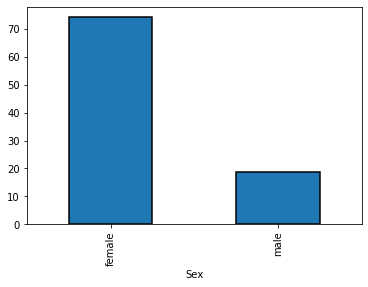

In [6]:
tmp = df_train.groupby('Survived').Sex
(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])*100).fillna(0).plot.bar(linewidth=1.5,
                                                                                             edgecolor='black')

In [7]:
tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])*100

Sex
female    74.203822
male      18.890815
Name: Sex, dtype: float64

74.20% of Survived are Female

##  Probabilty of Survival According to Passenger class

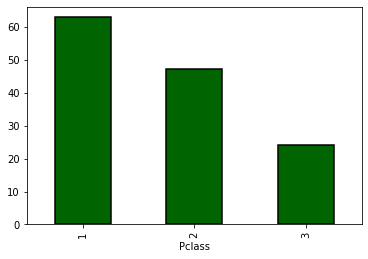

In [8]:
tmp = df_train.groupby('Survived').Pclass
(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])*100).plot.bar(color='darkgreen',edgecolor='black',
                                                                                  linewidth=1.5,tick_label = [1,2,33]
                                                                                  )

In [9]:
tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Pclass, dtype: float64

##  Probabilty of Survival According to Passenger Port of Embarkation 

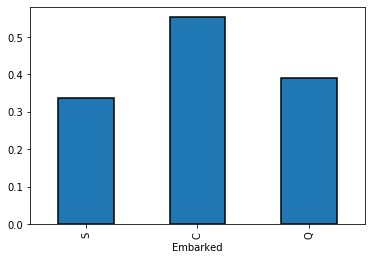

In [10]:
tmp = df_train.groupby('Survived').Embarked

(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])).plot.bar(edgecolor='black',
                                                                                  linewidth=1.5
                                                                                  )

In [11]:
tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])*100

Embarked
S    33.695652
C    55.357143
Q    38.961039
Name: Embarked, dtype: float64

## Data Prepration for ML Modeling

In [12]:
df_train.isnull().sum()/df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [13]:
# Here 'age' is numerical variable, we will impute it using fancyimpute
# while 'Embarked' is Categorical, here we will impute the value using Median : 'mode' 
# Cabin have about 70% missing value, therefore we will drop that

In [14]:
from fancyimpute import IterativeImputer

Using TensorFlow backend.


In [15]:
# Creating separate dataframe df_train2 to apply iterative imputation
df_train2 = df_train

In [16]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
df_train2 = df_train2.drop(['Name','Sex','Cabin','Ticket','Embarked','PassengerId'],axis=1)

In [18]:
# After imputing the value using fancy impute, the column name will be removed. There fore we are saving the column name
train_col = df_train2.columns

In [19]:
# train_clean is new dataframe to store df_train2 after imputation
train_clean = pd.DataFrame(IterativeImputer().fit_transform(df_train2))
train_clean.columns = train_col

In [20]:
train_clean.info()
# we can see the missing value have been imputeds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null float64
Pclass      891 non-null float64
Age         891 non-null float64
SibSp       891 non-null float64
Parch       891 non-null float64
Fare        891 non-null float64
dtypes: float64(6)
memory usage: 41.8 KB


In [21]:
#dropping age from df_train and add from train_clean
df_train = df_train.drop(['Age'],axis=1)

In [22]:
df_train['Age'] = train_clean['Age']

In [23]:
df_train.drop(['Cabin'], axis = 1, inplace = True)
# Dropping as its having too much missing value

In [24]:
# Few rows missing for categorial data
df_train['Embarked'].astype('category').value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Age            891 non-null float64
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


### Now there is no missing value in the training data

In [27]:
# Dropping off few unecessary columns
df_train = df_train.drop(['Name','Ticket'],axis=1)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
Age            891 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [29]:
# We have two object type variables

In [30]:
df_train[['Embarked']] = df_train[['Embarked']].apply(lambda x: x.map({'S':'Southampton','C' :'Cherbourg','Q' :'Queenstown'}))

In [31]:
cat_col = df_train[['Sex', 'Embarked']]

In [32]:
train_dummies = pd.get_dummies(cat_col, drop_first = True)
train_dummies.head()

,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [33]:
df_train = pd.concat([df_train, train_dummies], axis=1)

In [34]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,1,0,3,male,1,0,7.2500,Southampton,22.0,1,0,1
1,2,1,1,female,1,0,71.2833,Cherbourg,38.0,0,0,0
2,3,1,3,female,0,0,7.9250,Southampton,26.0,0,0,1
3,4,1,1,female,1,0,53.1000,Southampton,35.0,0,0,1
4,5,0,3,male,0,0,8.0500,Southampton,35.0,1,0,1


In [35]:
df_train = df_train.drop(['Sex','Embarked'],axis=1)

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId             891 non-null int64
Survived                891 non-null int64
Pclass                  891 non-null int64
SibSp                   891 non-null int64
Parch                   891 non-null int64
Fare                    891 non-null float64
Age                     891 non-null float64
Sex_male                891 non-null uint8
Embarked_Queenstown     891 non-null uint8
Embarked_Southampton    891 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.4 KB


In [37]:
# Normalizing the dataset only numerical columns
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
df_train[['Fare','Age']] = scaler.fit_transform(df_train[['Fare','Age']])

In [39]:
df_train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,1,0,3,1,0,-0.502445,-0.534248,1,0,1
1,2,1,1,1,0,0.786845,0.634340,0,0,0
2,3,1,3,0,0,-0.488854,-0.242101,0,0,1
3,4,1,1,1,0,0.420730,0.415230,0,0,1
4,5,0,3,0,0,-0.486337,0.415230,1,0,1


In [40]:
# Dividing the training data into X and y

In [41]:
y_train = df_train[['PassengerId','Survived']]
y_train = y_train.set_index('PassengerId')
# defining the Dataset containing the independent variables
X_train = df_train.drop('Survived', axis=1)
X_train = X_train.set_index('PassengerId')

In [42]:
import statsmodels.api as sm

In [43]:
col = X_train.columns

In [44]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\Atishay\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -383.79
Date:                Fri, 27 Dec 2019   Deviance:                       767.58
Time:                        02:03:50   Pearson chi2:                     928.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.6052      0.435     10.587      0.000       3.753       5.458
Pclass                  -1.2796      0.153     -8.341      0.000      -1.580      -0.979
SibSp                   -0.4382      0.109     -4.030      0.000      -0.651      -0.225
Parch                   -0.0875      0.122     -0.714      0.475      -0.328       0.153
Fare                     0.0751      0.119      0.633      0.526      -0.157       0.308
Age                     -0.7310      0.116     -6.318      0.000      -0.958      -0.504
Sex_male                -2.7209      0.204    -13.345      0.000      -3.121      -2.321
Embarked_Queenstown     -0.1076      0.392     -0.275      0.784      -0.875       0.660
Embarked_Southampton    -0.3776      0.241     -1.570      0.117      -0.849       0.094
========================================================================================
"""

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,Pclass,6.84
7,Embarked_Southampton,4.50
5,Sex_male,3.07
1,SibSp,1.70
2,Parch,1.62
6,Embarked_Queenstown,1.59
4,Age,1.31
3,Fare,1.21


In [48]:
col = col.drop('Embarked_Queenstown',1)
# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

C:\Users\Atishay\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -383.83
Date:                Fri, 27 Dec 2019   Deviance:                       767.65
Time:                        02:03:50   Pearson chi2:                     931.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.5842      0.428     10.719      0.000       3.746       5.422
Pclass                  -1.2878      0.150     -8.558      0.000      -1.583      -0.993
SibSp                   -0.4379      0.109     -4.033      0.000      -0.651      -0.225
Parch                   -0.0845      0.122     -0.693      0.488      -0.323       0.154
Fare                     0.0770      0.118      0.651      0.515      -0.155       0.309
Age                     -0.7317      0.116     -6.329      0.000      -0.958      -0.505
Sex_male                -2.7142      0.202    -13.423      0.000      -3.111      -2.318
Embarked_Southampton    -0.3436      0.206     -1.664      0.096      -0.748       0.061
========================================================================================
"""

In [49]:
col = col.drop('Parch',1)
# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -384.07
Date:                Fri, 27 Dec 2019   Deviance:                       768.14
Time:                        02:03:50   Pearson chi2:                     939.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.5749      0.427     10.726      0.000       3.739       5.411
Pclass                  -1.2989      0.149     -8.690      0.000      -1.592      -1.006
SibSp                   -0.4575      0.105     -4.340      0.000      -0.664      -0.251
Fare                     0.0596      0.114      0.523      0.601      -0.164       0.283
Age                     -0.7298      0.115     -6.320      0.000      -0.956      -0.503
Sex_male                -2.6868      0.198    -13.584      0.000      -3.074      -2.299
Embarked_Southampton    -0.3542      0.206     -1.722      0.085      -0.757       0.049
========================================================================================
"""

In [50]:
col = col.drop('Fare',1)
# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -384.21
Date:                Fri, 27 Dec 2019   Deviance:                       768.43
Time:                        02:03:50   Pearson chi2:                     938.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.6700      0.388     12.047      0.000       3.910       5.430
Pclass                  -1.3368      0.131    -10.175      0.000      -1.594      -1.079
SibSp                   -0.4467      0.103     -4.329      0.000      -0.649      -0.244
Age                     -0.7336      0.115     -6.366      0.000      -0.959      -0.508
Sex_male                -2.6923      0.198    -13.631      0.000      -3.079      -2.305
Embarked_Southampton    -0.3738      0.202     -1.848      0.065      -0.770       0.023
========================================================================================
"""

In [51]:
col = col.drop('Embarked_Southampton',1)
# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -385.91
Date:                Fri, 27 Dec 2019   Deviance:                       771.82
Time:                        02:03:50   Pearson chi2:                     944.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4643      0.367     12.161      0.000       3.745       5.184
Pclass        -1.3505      0.131    -10.306      0.000      -1.607      -1.094
SibSp         -0.4694      0.103     -4.553      0.000      -0.671      -0.267
Age           -0.7459      0.115     -6.483      0.000      -0.971      -0.520
Sex_male      -2.7285      0.197    -13.835      0.000      -3.115      -2.342
==============================================================================
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,Pclass,3.07
3,Sex_male,2.82
1,SibSp,1.36
2,Age,1.23


In [53]:
y_train_pred = log_model.predict(X_train_sm)

In [54]:
y_train_pred = y_train_pred.values.reshape(-1)

In [55]:
# Adding survival probablity 

In [56]:
y_train_pred_final = pd.DataFrame({'Survived':y_train.values.reshape(-1), 'Surv_Prob':y_train_pred})
y_train_pred_final['PassengerId'] = y_train.index
y_train_pred_final.head()

,Survived,Surv_Prob,PassengerId
0,0,0.084204,1
1,1,0.897641,2
2,1,0.644149,3
3,1,0.911711,4
4,0,0.067526,5


In [57]:
# Making prediction as 1 if probability is more than 0.5

In [58]:
y_train_pred_final['predicted'] = y_train_pred_final.Surv_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [59]:
# Let's see the head
y_train_pred_final.head()

,Survived,Surv_Prob,PassengerId,predicted
0,0,0.084204,1,0
1,1,0.897641,2,1
2,1,0.644149,3,1
3,1,0.911711,4,1
4,0,0.067526,5,0


In [60]:
# Create confusion matrix

In [61]:
from sklearn import metrics

In [62]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)

[[482  67]
 [ 92 250]]


In [63]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted ))

0.8215488215488216


In [64]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [65]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7309941520467836

In [66]:
# Let us calculate specificity
TN / float(TN+FP)

0.8779599271402551

In [67]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.122040072859745


In [68]:
# positive predictive value 
print (TP / float(TP+FP))

0.7886435331230284


In [69]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8397212543554007


In [70]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [71]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, y_train_pred_final.predicted, drop_intermediate = False )

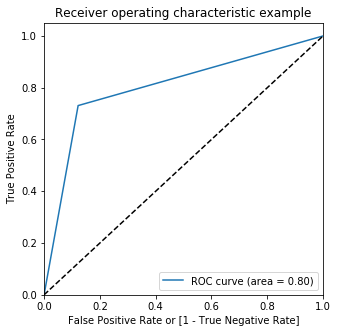

In [72]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.predicted)

In [73]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Surv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Surv_Prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.084204,1,0,1,0,0,0,0,0,0,0,0,0
1,1,0.897641,2,1,1,1,1,1,1,1,1,1,1,0
2,1,0.644149,3,1,1,1,1,1,1,1,1,0,0,0
3,1,0.911711,4,1,1,1,1,1,1,1,1,1,1,1
4,0,0.067526,5,0,1,0,0,0,0,0,0,0,0,0


In [74]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.609428  0.941520  0.402550
0.2   0.2  0.719416  0.856725  0.633880
0.3   0.3  0.762065  0.812865  0.730419
0.4   0.4  0.803591  0.780702  0.817851
0.5   0.5  0.821549  0.730994  0.877960
0.6   0.6  0.820426  0.669591  0.914390
0.7   0.7  0.792368  0.508772  0.969035
0.8   0.8  0.762065  0.403509  0.985428
0.9   0.9  0.701459  0.228070  0.996357


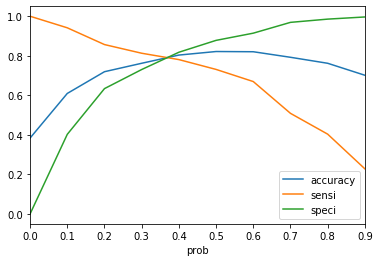

In [75]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [76]:
# 0.35 looks good

In [77]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Surv_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Survived,Surv_Prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.084204,1,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.897641,2,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.644149,3,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.911711,4,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.067526,5,0,1,0,0,0,0,0,0,0,0,0,0


In [78]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.7620650953984287

In [79]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion2

array([[401, 148],
       [ 64, 278]], dtype=int64)

In [80]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [81]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8128654970760234

In [82]:
# Let us calculate specificity
TN / float(TN+FP)

0.7304189435336976

In [83]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.26958105646630237


In [84]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6525821596244131


In [85]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8623655913978494


### Predicting on Test data

In [123]:
df_test[['Embarked']] = df_test[['Embarked']].apply(lambda x: x.map({'S':'Southampton','C' :'Cherbourg','Q' :'Queenstown'}))

In [124]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southampton
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southampton


In [125]:
cat_col = df_test[['Sex', 'Embarked']]
test_dummies = pd.get_dummies(cat_col, drop_first = True)
test_dummies.head()

,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,1,1,0
1,0,0,1
2,1,1,0
3,1,0,1
4,0,0,1


In [126]:
df_test = pd.concat([df_test, test_dummies], axis=1)

In [127]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southampton,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southampton,0,0,1


In [128]:
#y_test = df_test[['PassengerId','Survived']]
#y_test = y_test.set_index('PassengerId')
# defining the Dataset containing the independent variables
#X_test = df_test.drop('Survived', axis=1)
df_test = df_test.set_index('PassengerId')

In [129]:
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Queenstown,Embarked_Southampton
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown,1,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown,1,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southampton,1,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southampton,0,0,1
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,Southampton,1,0,1
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Queenstown,0,1,0
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,Southampton,1,0,1
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,Cherbourg,0,0,0


In [130]:
df_test[['Fare','Age']] = scaler.transform(df_test[['Fare','Age']])

In [131]:
df_test_final = df_test[['Pclass','Sex_male','SibSp','Age']]

In [132]:
X_test_sm = sm.add_constant(df_test_final)

C:\Users\Atishay\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [133]:
y_test_pred = log_model.predict(X_test_sm)

In [134]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)

In [135]:
y_test_pred.head()

,0
PassengerId,
892,0.251647
893,0.020688
894,0.005381
895,0.599827
896,0.754855


In [136]:
# Renaming the column 
y_test_pred = y_test_pred.rename(columns={ 0 : 'Surv_Prob'})

In [137]:
y_test_pred['pred_surv'] = y_test_pred.Surv_Prob.map( lambda x: 1 if x > 0.35 else 0)

In [138]:
y_test_pred.head()

,Surv_Prob,pred_surv
PassengerId,,
892,0.251647,0
893,0.020688,0
894,0.005381,0
895,0.599827,1
896,0.754855,1


In [139]:
y_test_pred['PassengerId'] = y_test_pred.index

In [141]:
y_test_pred.head(2)

,Surv_Prob,pred_surv,PassengerId
PassengerId,,,
892,0.251647,0,892
893,0.020688,0,893


In [143]:
output = pd.DataFrame({'PassengerId': y_test_pred.PassengerId, 'Survived': y_test_pred.pred_surv})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
